In [1]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [22]:
data=pd.read_csv('Data file.csv',parse_dates=['pdate'])
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


# Data-Preprocessing

### Exploratory data analysis

In [3]:
print("The Shape of dataset:",data.shape,'\n')
print("Information About the dataset:")
print(data.info(),'\n')
print('Statistical summary:\n',data.describe())

The Shape of dataset:- (209593, 37) 

Information About the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
Unnamed: 0              209593 non-null int64
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90   

In [29]:
#Droping any duplicate rows present in the dataset
data=data.drop_duplicates()
data.shape

(209562, 34)

31 duplicate rows are droped.

In [23]:
#Feature "Unnamed: 0" and mobile number of user(i.e. msisdn)have no effect on target variable.
#so we drop these 2 columns
data.drop(['Unnamed: 0','msisdn'],axis=1,inplace=True)
data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
#Checking featurewise nan values
data.isna().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Uni & Bivariate Analysis

In [25]:
#label
data.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

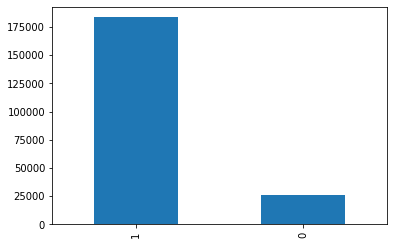

In [8]:
data.label.value_counts().plot.bar()

In [9]:
print('Percentage of Non-defaulter: ',round(len(data[data.label==1])/len(data.label),ndigits=3)*100,"%")
print('Percentage  of  Defaulter  : ',round(len(data[data.label==0])/len(data.label),ndigits=3)*100,"%")

Percentage of Non-defaulter:  87.5 %
Percentage  of  Defaulter  :  12.5 %


In [18]:
#telecom circle
data.pcircle.unique()

array(['UPW'], dtype=object)

For all the users telecom circle is same so presence of pcircle is adding no value to the model so we drop
pcircle

In [24]:
data.drop('pcircle',axis=1,inplace=True)

In [34]:
#date
df_dates=pd.DataFrame()
df_dates['Year']=data.pdate.dt.year
df_dates['Month']=data.pdate.dt.month_name()
df_dates['Day']=data.pdate.dt.day_name()
df_dates['label']=data.label
df_dates

,Year,Month,Day,label
0,2016,July,Wednesday,0
1,2016,August,Wednesday,1
2,2016,August,Friday,1
3,2016,June,Monday,1
4,2016,June,Wednesday,1
...,...,...,...,...
209588,2016,June,Friday,1
209589,2016,June,Sunday,1
209590,2016,July,Friday,1
209591,2016,July,Monday,1


In [38]:
print(df_dates.Year.unique(),'\n')
print(df_dates.Month.unique(),'\n')
print(df_dates.Day.unique(),'\n')

[2016] 

['July' 'August' 'June'] 

['Wednesday' 'Friday' 'Monday' 'Saturday' 'Tuesday' 'Sunday' 'Thursday'] 



It is the dataset for the month of June,July and August 2016

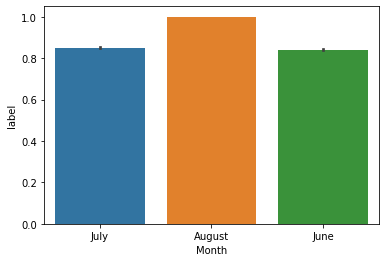

In [40]:
sns.barplot(x='Month',y='label',data=df_dates)
plt.show()

In [46]:
A=df_dates.groupby('Month')
june=A.get_group('June')
june

,Year,Month,Day,label
3,2016,June,Monday,1
4,2016,June,Wednesday,1
8,2016,June,Wednesday,1
9,2016,June,Wednesday,1
10,2016,June,Sunday,1
...,...,...,...,...
209576,2016,June,Wednesday,1
209583,2016,June,Thursday,1
209584,2016,June,Monday,0
209588,2016,June,Friday,1


1    69893
0    13236
Name: label, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


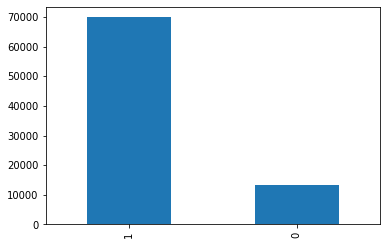

In [52]:
print(june.label.value_counts())
print(june.label.value_counts().plot.bar())

1    72863
0    12897
Name: label, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


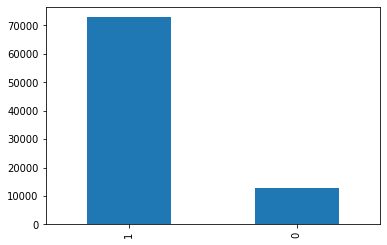

In [51]:
july=A.get_group('July')
print(july.label.value_counts())
print(july.label.value_counts().plot.bar())

1    40673
Name: label, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


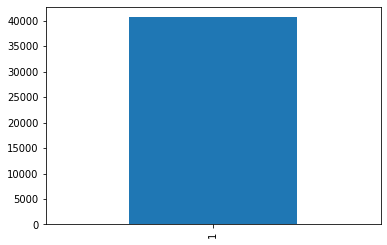

In [53]:
august=A.get_group('August')
print(august.label.value_counts())
print(august.label.value_counts().plot.bar())

In the month of August 2016 there are no defaulter. All the 40673 new users are non-defaulter

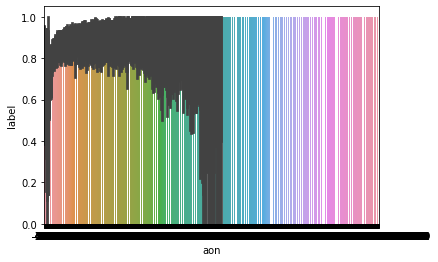

In [56]:
#aon
sns.barplot(x='aon',y='label',data=data)

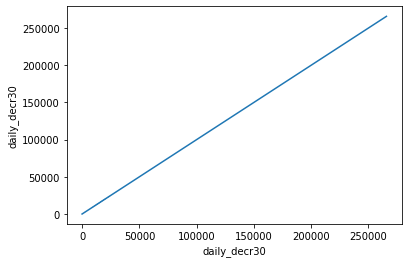

In [57]:
sns.lineplot(x='daily_decr30',y='daily_decr30',data=data)
plt.show()

Daily amount spent from main account, averaged over last 30 days is directly propertional to Daily amount spent from main account, averaged over last 90 days

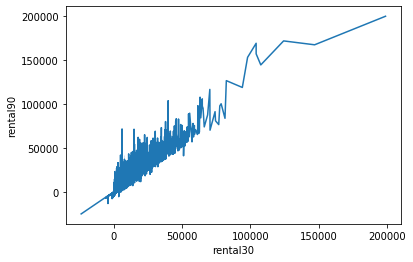

In [58]:
sns.lineplot(x='rental30',y='rental90',data=data)
plt.show()

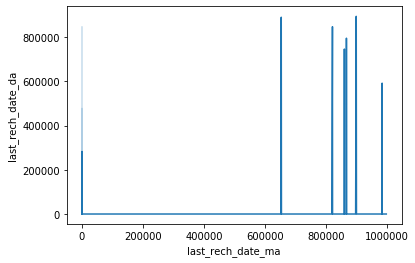

In [59]:
sns.lineplot(x='last_rech_date_ma',y='last_rech_date_da',data=data)
plt.show() 

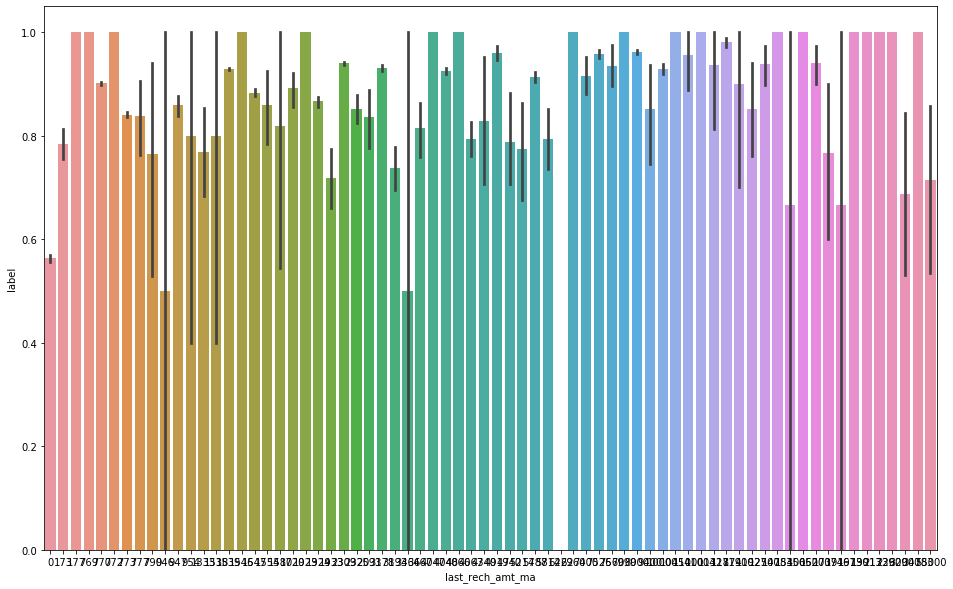

In [62]:
plt.figure(figsize=(16,10))
sns.barplot(x='last_rech_amt_ma',y='label',data=data)
plt.show()

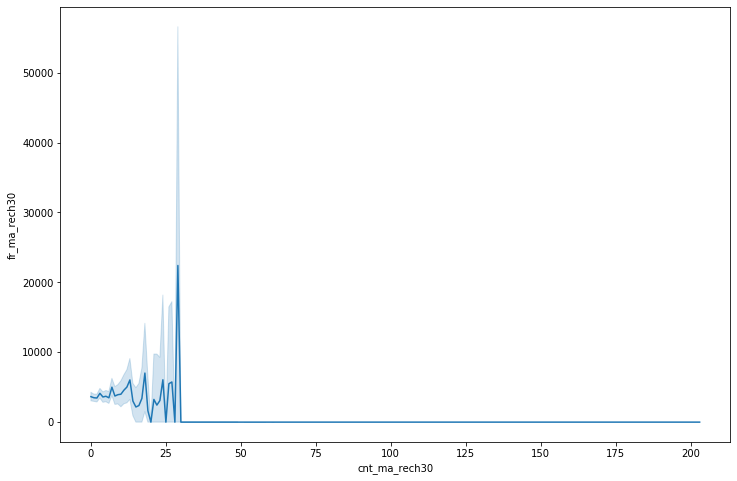

In [64]:
plt.figure(figsize=(12,8))
sns.lineplot(x='cnt_ma_rech30',y='fr_ma_rech30',data=data)
plt.show()

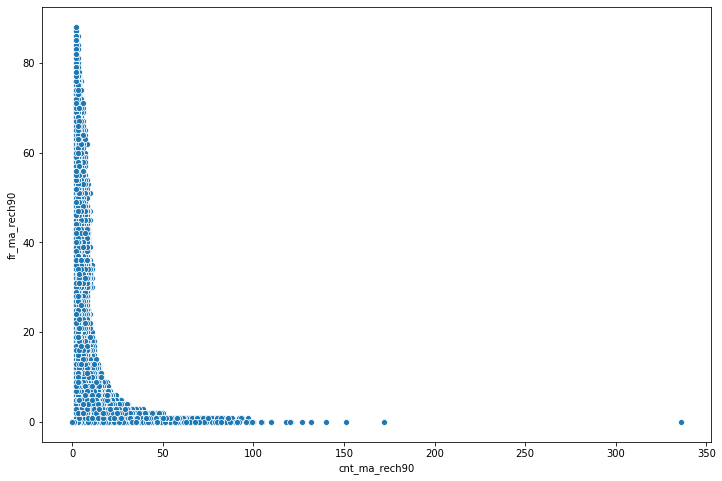

In [65]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='cnt_ma_rech90',y='fr_ma_rech90',data=data)
plt.show()

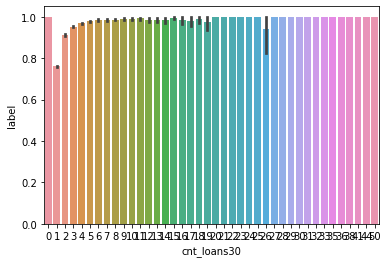

In [68]:
sns.barplot(x='cnt_loans30',y='label',data=data)
plt.show()

 More the Number of loans taken by user in last 30 days more is the succes ratio to pay the loan amount.

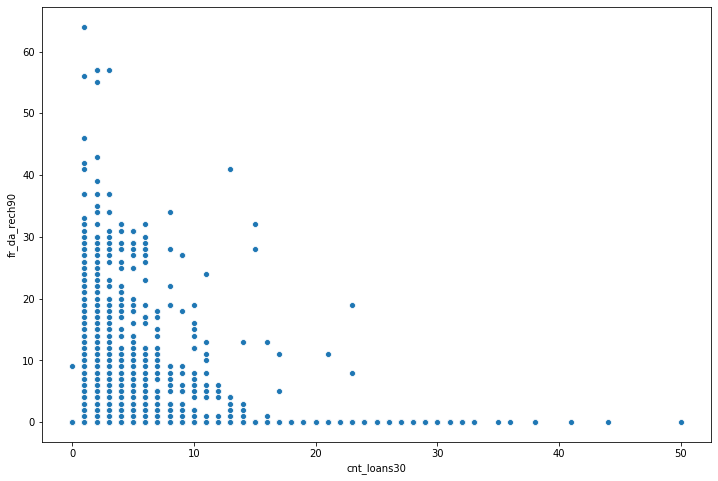

In [67]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='cnt_loans30',y='fr_da_rech90',data=data)
plt.show()

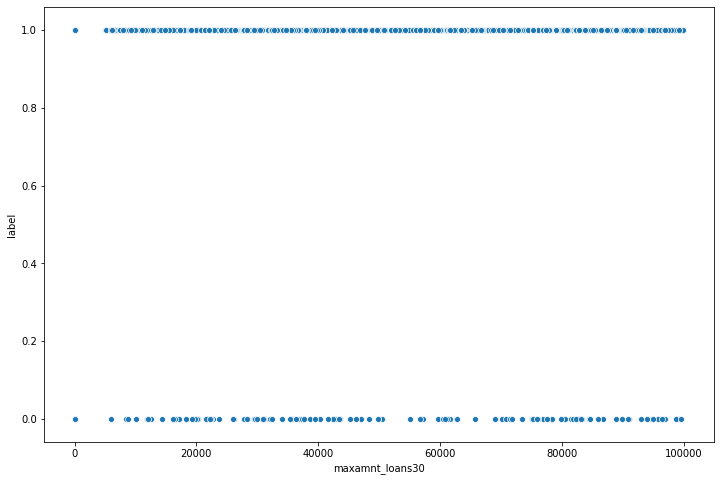

In [71]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='maxamnt_loans30',y='label',data=data)
plt.show()

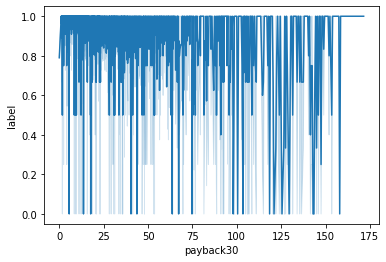

In [77]:
sns.lineplot(x='payback30',y='label',data=data)
plt.show()

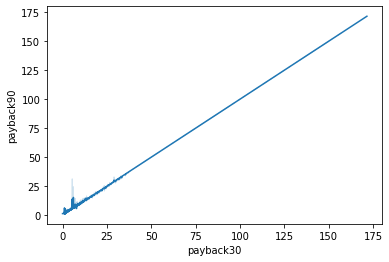

In [78]:
sns.lineplot(x='payback30',y='payback90',data=data)
plt.show()

Average payback time in days over last 30 days is directly propersional to Average payback time in days over last 90 days

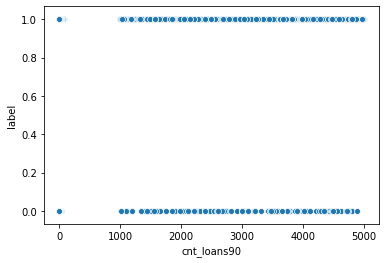

In [74]:
sns.scatterplot(x='cnt_loans90',y='label',data=data)
plt.show()

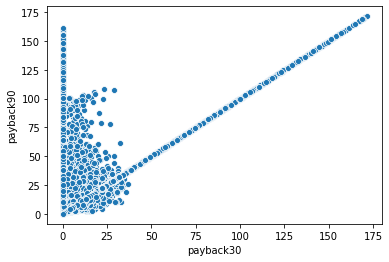

In [79]:
sns.scatterplot(x='payback30',y='payback90',data=data)
plt.show()

# Checking Correlation

In [80]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003825,0.168174,0.166034,0.057886,0.075339,0.003705,0.001687,0.131558,0.237120,...,0.196133,0.197123,0.000225,0.044521,0.004707,0.199649,0.084064,0.035681,0.048213,0.049050
aon,-0.003825,1.000000,0.001096,0.000366,-0.000969,-0.000799,0.001691,-0.001694,0.004243,-0.003162,...,-0.001836,-0.001736,-0.002765,0.004660,-0.000612,-0.002329,-0.001196,0.002767,0.001936,0.002199
daily_decr30,0.168174,0.001096,1.000000,0.977703,0.442038,0.458950,0.000481,-0.001641,0.275787,0.451347,...,0.366081,0.471463,-0.000033,-0.011631,0.008956,0.563473,0.400184,-0.037325,0.026891,0.047148
daily_decr90,0.166034,0.000366,0.977703,1.000000,0.434658,0.471705,0.000903,-0.001892,0.264082,0.426670,...,0.340352,0.447840,0.000020,-0.005611,0.009440,0.567182,0.397237,-0.034705,0.019377,0.040775
rental30,0.057886,-0.000969,0.442038,0.434658,1.000000,0.955235,-0.001101,0.003255,0.127204,0.233281,...,0.180153,0.233406,-0.000870,-0.016505,0.004005,0.298902,0.234190,-0.035510,0.072942,0.095114
rental90,0.075339,-0.000799,0.458950,0.471705,0.955235,1.000000,-0.001694,0.002788,0.121351,0.230199,...,0.171546,0.231861,-0.001417,-0.009488,0.005134,0.327397,0.251008,-0.034143,0.067083,0.099473
last_rech_date_ma,0.003705,0.001691,0.000481,0.000903,-0.001101,-0.001694,1.000000,0.001790,-0.000156,0.004302,...,0.001186,0.000896,0.000928,0.001833,-0.000226,0.000863,-0.001126,0.002768,-0.002235,-0.001586
last_rech_date_da,0.001687,-0.001694,-0.001641,-0.001892,0.003255,0.002788,0.001790,1.000000,-0.000158,0.001540,...,0.000373,0.000529,0.000502,0.000059,-0.000973,0.000512,0.001520,-0.002241,0.000075,0.000414
last_rech_amt_ma,0.131558,0.004243,0.275787,0.264082,0.127204,0.121351,-0.000156,-0.000158,1.000000,-0.002778,...,-0.027699,0.008418,0.000992,0.028341,0.000083,0.013985,0.148427,0.020976,-0.027408,-0.014304
cnt_ma_rech30,0.237120,-0.003162,0.451347,0.426670,0.233281,0.230199,0.004302,0.001540,-0.002778,1.000000,...,0.765783,0.752277,0.000101,-0.067048,0.014694,0.685232,0.174072,-0.071486,0.043565,0.017304


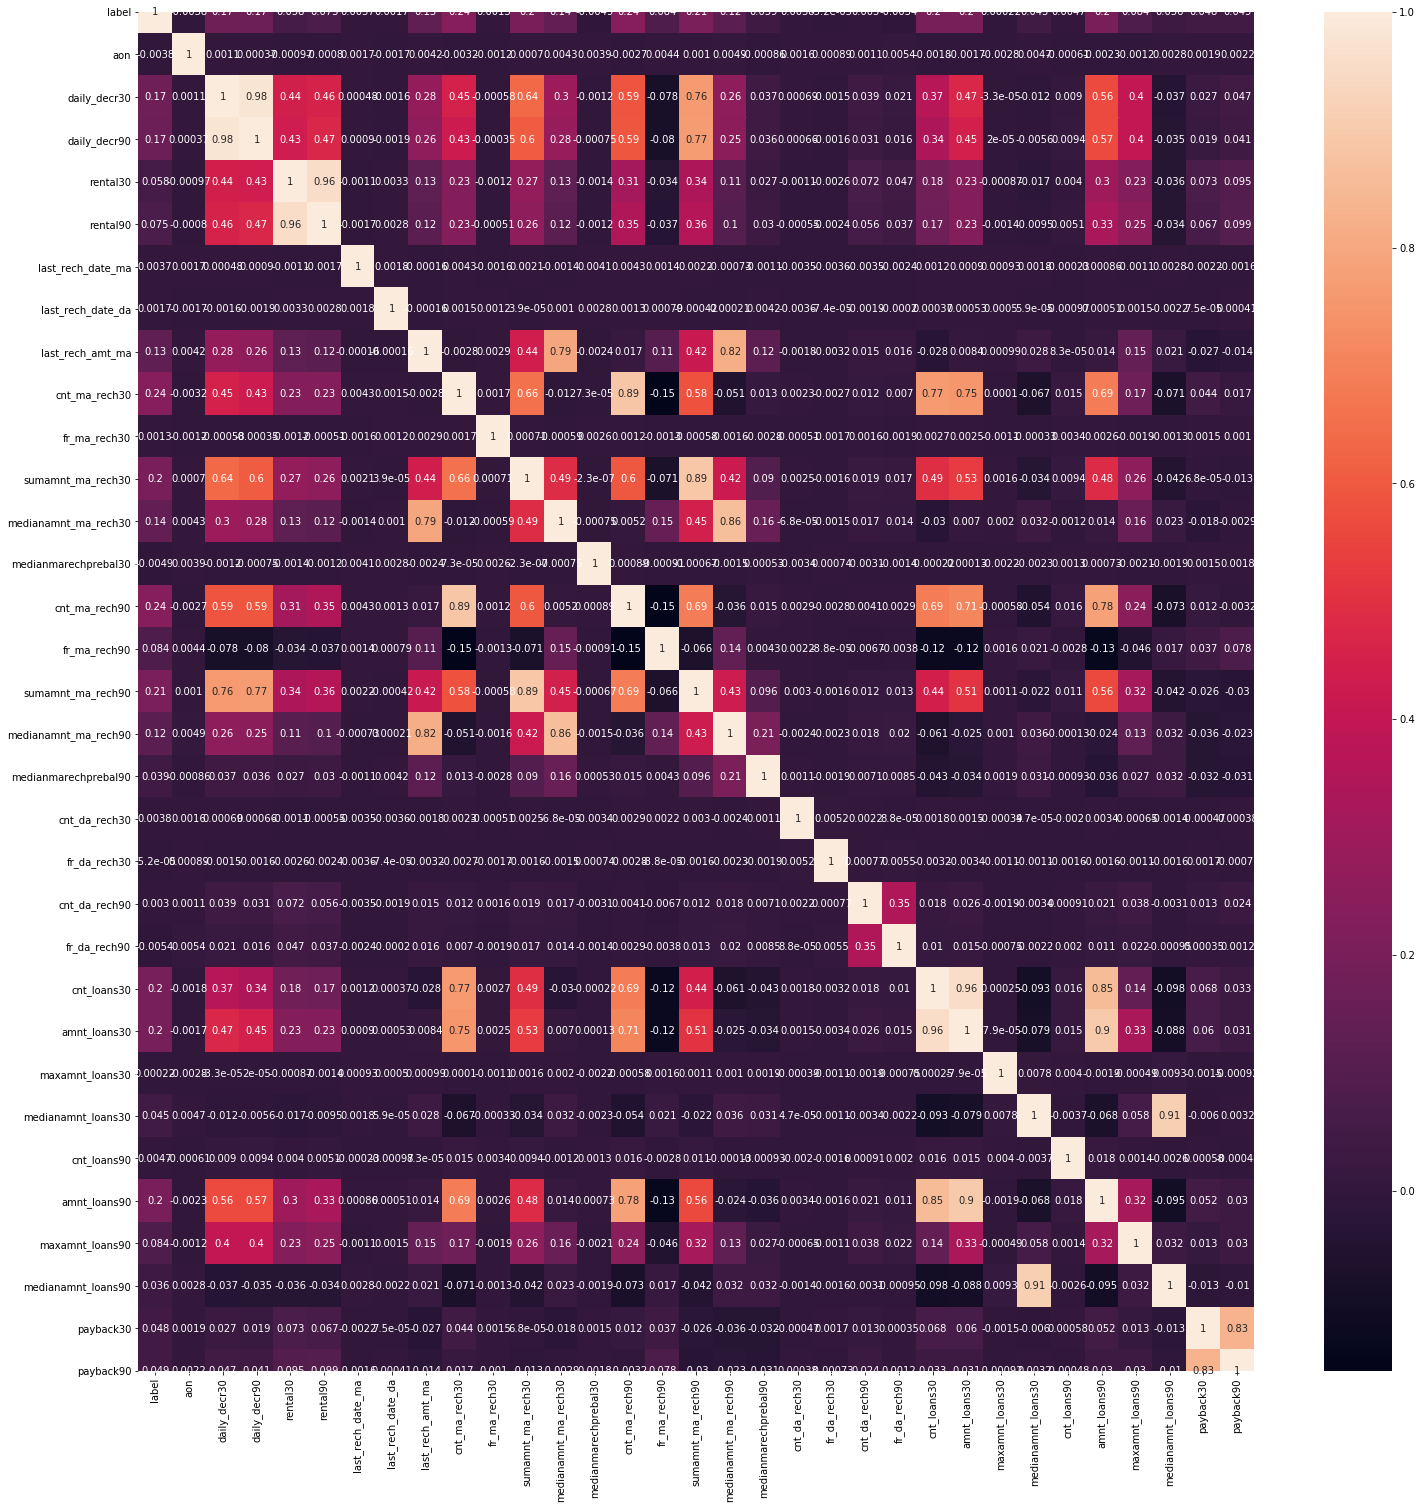

In [86]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True)

fr_ma_rech90 and fr_ma_rech30, fr_ma_rech90 and fr_ma_rech30,amnt_loans90 and cnt_loans90 are highly negatively correlated with each other so we drop anyone side of each pair.

pdate also not required for model creation so we drop it.

In [88]:
data.drop(['fr_ma_rech30','fr_ma_rech30','cnt_loans90'],axis=1,inplace=True)
data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [90]:
data.drop('pdate',axis=1,inplace=True)

# Checking for outliers

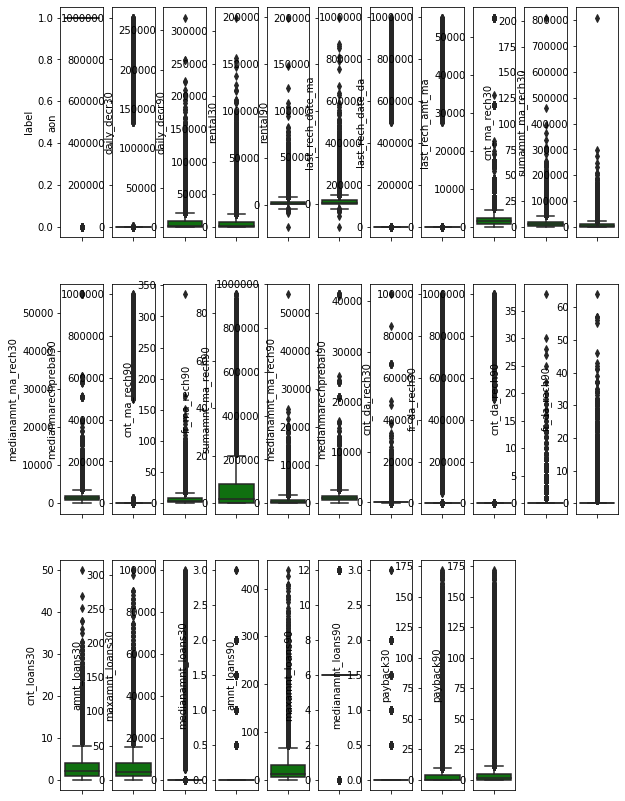

In [94]:
collist=data.columns
rows=10
cols=20
plt.figure(figsize=(10,50))
for i in range(0,len(collist)):
    plt.subplot(10,11,i+1)
    sns.boxplot(data[collist[i]],orient='v',color='green')
    #plt.tight_layout()

In [95]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[2.64935018, 0.10358473, 0.25237   , ..., 0.22961154, 2.90462003,
        2.39398367],
       [0.37745105, 0.09777242, 0.73091668, ..., 0.22961154, 0.38565742,
        0.41926306],
       [0.37745105, 0.10011055, 0.43207267, ..., 0.22961154, 0.38565742,
        0.41926306],
       ...,
       [0.37745105, 0.09379627, 0.70067198, ..., 0.22961154, 0.06817396,
        0.04739711],
       [0.37745105, 0.08429843, 0.77063318, ..., 0.22961154, 0.38565742,
        0.59932627],
       [0.37745105, 0.08629311, 0.09682266, ..., 0.22961154, 0.38565742,
        0.41926306]])

In [104]:
Data_new=data[(z<5.4).all(axis=1)]
Data_new

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0,2,12,6.0,0.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0,1,12,12.0,0.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0,1,6,6.0,0.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0,2,12,6.0,0.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0,7,42,6.0,0.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,0,2,12,6.0,0.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,0,3,18,6.0,0.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,0,4,42,12.0,0.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,0,2,18,12.0,0.0,24,12,0.0,0.000000,10.500000


In [106]:
print("The percentage of new data upon the base data: ",193959/209593*100,"%")

The percentage of new data upon the base data:  92.54078141922679 %


In [108]:
#Data Preprocessing is done. the cleaned data i.e. Data_new is saved to perform machine learning
Data_new.to_csv('micro_credit.csv')